### Updated GitHub repository: 
https://github.coecis.cornell.edu/zm68/INFO-2950-Project

### Research Questions:
- What are the sources of failure in restaurants in Nashville, TN?
- What characteristics make up a successful restaurant in Nashville, TN?
- Is there a relationship between the number of reviews and whether or not a restaurant is closed?
- Is the general tone of reviews different for restaurants that are closed versus those that are open?

### Data description:

#### What are the observations (rows) and the attributes (columns)? 
The observations in the Yelp Business Dataset are done by businesses (identified by their business IDs). Each business is accompanied by their name, address, city, state, postal code, latitude, longitude, review stars, number of reviews, whether or not the business is closed or not, categories (industry), specific attributes of the businesses depending on their categories, and hours of operation. The observations in the Yelp Tips Dataset are done by businesses (identified by their business IDs). Each business is accompanied by certain users, their respective review text, the date they submitted their reviews, and the complement counts. 

#### Why was this dataset created? 
According to Yelp, this dataset is used for learning purposes. It was originally used for the Yelp Dataset Challenge where students were prompted to come up with an interesting project for the opportunity to win awards for $5,000 and other smaller recognitions. Their goal in creating this dataset was to use JSON files to teach students about databases and NLP, and to showcase a subset of their business data for individuals to use professionally and academically for their own purposes. 

#### Who funded the creation of the dataset? 
Yelp was the funding agency for the creation of this dataset. Its associated funding type is also by grants. Yelp engineers developed a search engine to look through millions of reviews in order for individuals to identify local businesses that best suit their needs. 

#### What processes might have influenced what data was observed and recorded and what was not?
The Yelp data is a bit restricted since it explicitly does not contain data that may be strictly confidential and protected by legal privilege. For example, there is a bit of anonymity with the businesses since the owners are not stated within the dataset and protected characteristics like race and gender are not included. Abiding with these legal protections is necessary so that Yelp as a company could avoid legal trouble associated with publically publishing this data. 

#### What preprocessing was done, and how did the data come to be in the form that you are using? 
The raw dataset that was downloaded from the Yelp Dataset was divided up into separate files that were consistent with a certain theme. For example, one data file that we used included data solely focused on businesses and another included data solely focused on review data. To further clean up the datasets, there were numerous steps done to filter the data frames that were created in order to fit the questions we were looking to answer with our analysis. 

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
In the privacy policy in the terms of conditions stated by Yelp, it warns businesses and residents who submit reviews that Yelp will collect “various categories of personal information when they use the service” (https://terms.yelp.com/privacy/en_us/20200101_en_us/#:~:text=Yelp%20does%20not%20sell%20your,disclosure%20of%20your%20personal%20information). If most people ignored the terms of conditions when creating an account to post reviews or do searching on Yelp, they probably would have no idea that their data has been used in this dataset. Some people in the minority may have at least skimmed over the privacy policy and realized that Yelp would be using some of their personal data and public data that they posted themselves to aggregate information. Businesses are also consenting to having some of their information shared and collected by the company. 


#### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)
- https://www.yelp.com/dataset (The original source with full dataset and documentation available)
- https://drive.google.com/file/d/1Yu7s_-nPZoTu4p7nv4VfQkHnOyF9yRKK/view?usp=sharing (for business data)
- https://drive.google.com/file/d/1m_f6NVsDzXKE5gYcAdgeqaCmkT6JpYQ7/view?usp=sharing (for tip data)

### Data Limitations

On our end, the file sizes were a real limitation to our analysis. For example, we were originally looking to work with the Yelp Reviews Dataset, but the file size exceeded 6 GB. Due to this, Jupyter Notebook would give errors referencing its lack of memory for dealing with a file of this magnitude. Due to this, we had to pivot our research questions and analysis to reference the Tips Dataset. However, this means that we have less data points that we can use to analyze restaurants that have failed. Initially, we were curious to see whether the number of reviews and the associated common words found in reviews had any correlation to whether or not a business remained open. Now, without this portion of data, we have to focus more on restaurants that have been successful which may be harder to generalize for our conclusions. 

A second limitation could be that in deleting stopwords, we lose 71% of context in our tip_data text data that could lead to inaccurate findings from our sentiment analysis. For example, a negative comment could be deemed neutral because most of the stopwords it contained were removed, and it just so happened that these words were critical to the sentiment. 

Another limitation to our data is the fact that the dataset focuses on only local businesses. This means that the data excludes restaurant data that includes popular franchises such as fast food restaurant chains. These restaurants can have impacts on whether or not certain local businesses remain open, but since these aren’t included in the dataset, we can’t look at the impact of these and their distances from certain businesses in our analysis. 

### Questions for Reviewers:
- We used dropna() to eliminate some of the data, is this ethical to eliminate unnecessary data or is it eliminating too much of our data?
- What consitutes as "too narrow" for the data? How many rows should we aim to have for our analysis and would what we have currently be enough?


### Data Collection/Cleaning/Analysis

Since the original data was compiled into a tarfile, to access it within Jupyter Notebook, we had to first import the tarfile library in Python so that we could read and write with tar archive files. Then, we opened our dataset from the Yelp Database and extracted all the files. After, we closed the tar file.

In [2]:
import tarfile
file = tarfile.open('yelp_dataset.tar')
file.extractall('./project_files')
file.close()

To start doing some cleaning on our chosen data, we first imported the json, pandas, and numpy library. We also loaded the sql extension.

In [2]:
import json
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression

%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

Here, we opened the Yelp Academic Dataset Business Json file and read it. We then converted the file into a CSV file so that we could more easily manipulate and clean the data.

In [4]:
with open('./project_files/yelp_academic_dataset_business.json', encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile, lines=True)
df.to_csv('./project_files/yelp_academic_dataset_business.csv', encoding='utf-8', index = False)

After converting the data, we used the pandas library to read the csv file and set it equal to a data frame we called data.

First, we wanted to extract all the businesses that were categorized as restaurants, so we looked at the categories column in our data frame and picked out businesses where the content in their category descriptions included the word "Restaurants" in them. We then displayed that data to check whether this piece of code worked.

In [5]:
data = pd.read_csv('./project_files/yelp_academic_dataset_business.csv')
data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


Here, we are narrowing down our data even more by selecting the restaurant businesses that were given from the previous cell and filtering them down even more to only include restaurants that were located in a certain area. In this case, we looked at restaurants in the Nashville, TN area. Our goal with this was to analyze restaurants on 2nd Ave which is known to be a historic tourist destination, so we had to first find the broader category of Nashville restaurants so that we can compare restaurants that aren't on 2nd Ave in Nashville with those that are.

In [7]:
data = data.dropna()
data = data[data["categories"].str.contains('Restaurants')]
data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{'WiFi': ""'free'"", 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '..."
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


Here, we are narrowing down our data even more by selecting the restaurant businesses that were given from the previous cell and filtering them down even more to only include restaurants that were located in a certain area. In this case, we looked at restaurants in the Nashville, TN area. Our goal with this was to analyze restaurants on 2nd Ave which is known to be a historic tourist destination, so we had to first find the broader category of Nashville restaurants so that we can compare restaurants that aren't on 2nd Ave in Nashville with those that are.

In [8]:
postal = data[data["postal_code"].str.contains("37201")]
print(len(postal))
postal

115


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","Restaurants, Japanese, Seafood","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2..."
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ..."
159,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,TN,37201,36.162799,-86.776016,4.0,182,1,"{'GoodForDancing': 'True', 'Smoking': ""u'no'"",...","Nightlife, Restaurants, Bars, Mexican","{'Monday': '0:0-0:0', 'Wednesday': '11:0-22:0'..."
798,Gki1ureeRKqlIkQ-AELDVg,Brugada,204 Commerce St,Nashville,TN,37201,36.163323,-86.776592,3.5,49,1,"{'NoiseLevel': ""'average'"", 'Caters': 'False',...","Restaurants, Nightlife, Dance Clubs, Falafel, ...","{'Monday': '17:0-2:30', 'Tuesday': '17:0-2:30'..."
1044,RJPRi1pwocHNZr9ISz_P-A,National Underground,105 Broadway,Nashville,TN,37201,36.161795,-86.774466,2.5,126,0,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...","Music Venues, American (New), Restaurants, Nig...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145129,0uL-FXY1M2UC12eZcFlTuQ,The Hampton Social - Nashville,201 1st Ave S,Nashville,TN,37201,36.159959,-86.773254,4.5,608,1,"{'CoatCheck': 'False', 'RestaurantsReservation...","American (New), Cocktail Bars, American (Tradi...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
145577,hojhzuA9hiTHk_NtdaWWpw,Mediterranean Cuisine,204 Commerce St,Nashville,TN,37201,36.163289,-86.776467,3.5,19,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Greek, Mediterranean, Restaurants, Middle Eastern","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
148131,NfOnxD8NT4UQmSfBY6iqng,The George Jones,128 2nd Ave N,Nashville,TN,37201,36.162983,-86.775375,3.5,316,0,"{'BusinessParking': ""{'garage': True, 'street'...","Restaurants, Arts & Entertainment, Bars, Night...","{'Monday': '0:0-0:0', 'Thursday': '11:0-22:0',..."
148956,nygJ4mY0glpdWGv_Hmp6Dg,Joe's Crab Shack,123 2nd Ave S,Nashville,TN,37201,36.160947,-86.774865,3.0,192,1,"{'OutdoorSeating': 'True', 'BYOBCorkage': ""'no...","American (Traditional), Seafood, Gluten-Free, ...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


Here, we are narrowing down our restaurant data in Nashville to include only those restaurants where the address contains the fact that the restaurants are on 2nd Ave. To compare the number of restaurants that fit this category and the one in the cell above, we printed out the length of this data frame and then displayed the data frame to showcase the magnitude in change of the number of rows after the cleaning..

In [9]:
# data["address"] = data["adress"].astype(str)
two_ave = postal[postal["address"].str.contains("2nd Ave")]
print(len(two_ave))
two_ave

31


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ..."
159,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,TN,37201,36.162799,-86.776016,4.0,182,1,"{'GoodForDancing': 'True', 'Smoking': ""u'no'"",...","Nightlife, Restaurants, Bars, Mexican","{'Monday': '0:0-0:0', 'Wednesday': '11:0-22:0'..."
1494,8s1uT8dyBEUwTNeHoZntMg,El Rey,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776160,3.0,89,0,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, Mexican","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
4689,QUxFneps0qX5S8XpEUnazg,Piranha's Bar & Grill,113 2nd Ave N,Nashville,TN,37201,36.162251,-86.775710,4.0,75,0,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Restaurants, Dive Bars, Sports Bars, Bars, Nig...","{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ..."
7710,xB2NmS0JG1Vgy7dK2ftcwQ,Taco Bell Cantina,131 2nd Ave N,Nashville,TN,37201,36.162724,-86.776014,2.5,26,1,{'RestaurantsDelivery': 'True'},"Arts & Entertainment, Music Venues, Fast Food,...","{'Monday': '10:0-1:45', 'Tuesday': '10:0-1:45'..."
17517,maOMGu_2dSHKydBgZdTsvQ,Wildhorse Saloon,120 2nd Ave N,Nashville,TN,37201,36.162766,-86.775178,3.5,559,1,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Tours, Local Flavor, Hotels & Travel, Arts & E...","{'Thursday': '16:0-22:0', 'Friday': '12:0-0:0'..."
26266,xlMQBBt9wrtahdqiRDcVSg,The Stillery,113 2nd Ave N,Nashville,TN,37201,36.162249,-86.775712,4.5,2588,1,"{'BikeParking': 'True', 'CoatCheck': 'False', ...","American (New), Restaurants, Pubs, Beer, Wine ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
27061,LF8UjsBRaQ4Aqwu3ARxnBg,Rodizio Grill The Brazilian Steakhouse,"166 2nd Ave N, Ste C",Nashville,TN,37201,36.164010,-86.776030,4.0,510,1,"{'BikeParking': 'False', 'RestaurantsAttire': ...","Gluten-Free, Brazilian, Restaurants, Steakhouses","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',..."
40375,DaQ6YSXmoXQH1qYXNSR1hA,Hooters,184 2nd Ave N,Nashville,TN,37201,36.164572,-86.776655,2.0,115,0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'T...","American (Traditional), Chicken Wings, Bars, N...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
55579,E8nFvonCaW63W9d3zUYhgQ,Bebo's Cafe,135 2nd Ave N,Nashville,TN,37201,36.162812,-86.776075,2.0,12,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Cafes, Restaurants, Nightlife, Bars, Hookah Ba...","{'Monday': '17:0-3:0', 'Tuesday': '17:0-3:0', ..."


Here, we are checking whether the restaurants on 2nd Ave are still open or not by using the binary column "is_open" that is given in the data. We then selected all the restaurants on 2nd Ave that are closed and created a new data frame with this data. We again printed the length of the new data frame and displayed the contents to showcase the magnitude in change of the number of rows after the cleaning.

In [10]:
is_closed = two_ave[two_ave["is_open"] == 0]
print(len(is_closed))
is_closed

14


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1494,8s1uT8dyBEUwTNeHoZntMg,El Rey,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776160,3.0,89,0,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, Mexican","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
4689,QUxFneps0qX5S8XpEUnazg,Piranha's Bar & Grill,113 2nd Ave N,Nashville,TN,37201,36.162251,-86.775710,4.0,75,0,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Restaurants, Dive Bars, Sports Bars, Bars, Nig...","{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ..."
40375,DaQ6YSXmoXQH1qYXNSR1hA,Hooters,184 2nd Ave N,Nashville,TN,37201,36.164572,-86.776655,2.0,115,0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'T...","American (Traditional), Chicken Wings, Bars, N...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
55579,E8nFvonCaW63W9d3zUYhgQ,Bebo's Cafe,135 2nd Ave N,Nashville,TN,37201,36.162812,-86.776075,2.0,12,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Cafes, Restaurants, Nightlife, Bars, Hookah Ba...","{'Monday': '17:0-3:0', 'Tuesday': '17:0-3:0', ..."
58366,JWUkEIayb3F8la3TWe-eyw,Stockyard,901 2nd Ave N,Nashville,TN,37201,36.157588,-86.780780,2.5,122,0,"{'BYOB': 'False', 'GoodForKids': 'False', 'Goo...","Steakhouses, Restaurants, Food, Desserts","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
78237,VuubVgCDC4rbvF_iPIhh1A,Bartella,164 2nd Ave N,Nashville,TN,37201,36.163949,-86.775981,4.5,12,0,"{'Corkage': 'False', 'RestaurantsTableService'...","Desserts, French, Breakfast & Brunch, Restaura...","{'Tuesday': '10:0-21:0', 'Wednesday': '10:0-21..."
81389,cxQ3CKel3EEZLYEyu9v3og,Choices Restaurant & Bar,128 2nd Ave N,Nashville,TN,37201,36.163090,-86.775096,2.5,13,0,"{'HappyHour': 'True', 'WheelchairAccessible': ...","Bars, Nightlife, American (Traditional), South...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
91769,WrgdQF8kzvONbZctSPlF4A,Ichiban,109 2nd Ave N,Nashville,TN,37201,36.162124,-86.775627,4.0,144,0,"{'NoiseLevel': ""u'quiet'"", 'OutdoorSeating': '...","Sushi Bars, Japanese, Restaurants","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
92564,um2W1Gi4-zR7e17t5pZ_Pg,Nashville Street Tacos,129 2nd Ave N,Nashville,TN,37201,36.162625,-86.775847,3.5,103,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Mexican, Food","{'Monday': '11:0-21:0', 'Tuesday': '11:0-23:0'..."
109109,9TvJuG22ZyCXJVYzDaDNxw,Pita Pit,121 2nd Ave N,Nashville,TN,37201,36.162500,-86.775760,3.0,79,0,"{'WiFi': ""'no'"", 'OutdoorSeating': 'False', 'R...","Fast Food, Restaurants, Event Planning & Servi...","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."


Now, we are creating a new data frame with restaurants on 2nd Ave that are still open, printed the length of the data frame, and displayed the data frame. This is so that we can compare the characteristics of closed restaurants from the cell above and open restaurants.

Here, we are narrowing down our restaurant data in Nashville to include only those restaurants where the address contains the fact that the restaurants are on 2nd Ave. To compare the number of restaurants that fit this category and the one in the cell above, we printed out the length of this data frame and then displayed the data frame.

In [11]:
is_open = two_ave[two_ave["is_open"] == 1]
print(len(is_open))
is_open

17


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ..."
159,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,TN,37201,36.162799,-86.776016,4.0,182,1,"{'GoodForDancing': 'True', 'Smoking': ""u'no'"",...","Nightlife, Restaurants, Bars, Mexican","{'Monday': '0:0-0:0', 'Wednesday': '11:0-22:0'..."
7710,xB2NmS0JG1Vgy7dK2ftcwQ,Taco Bell Cantina,131 2nd Ave N,Nashville,TN,37201,36.162724,-86.776014,2.5,26,1,{'RestaurantsDelivery': 'True'},"Arts & Entertainment, Music Venues, Fast Food,...","{'Monday': '10:0-1:45', 'Tuesday': '10:0-1:45'..."
17517,maOMGu_2dSHKydBgZdTsvQ,Wildhorse Saloon,120 2nd Ave N,Nashville,TN,37201,36.162766,-86.775178,3.5,559,1,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Tours, Local Flavor, Hotels & Travel, Arts & E...","{'Thursday': '16:0-22:0', 'Friday': '12:0-0:0'..."
26266,xlMQBBt9wrtahdqiRDcVSg,The Stillery,113 2nd Ave N,Nashville,TN,37201,36.162249,-86.775712,4.5,2588,1,"{'BikeParking': 'True', 'CoatCheck': 'False', ...","American (New), Restaurants, Pubs, Beer, Wine ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
27061,LF8UjsBRaQ4Aqwu3ARxnBg,Rodizio Grill The Brazilian Steakhouse,"166 2nd Ave N, Ste C",Nashville,TN,37201,36.164010,-86.776030,4.0,510,1,"{'BikeParking': 'False', 'RestaurantsAttire': ...","Gluten-Free, Brazilian, Restaurants, Steakhouses","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',..."
71945,UlrEGYuRd5pxW0n4iCR9CQ,Chicken Guy!,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776068,3.0,24,1,"{'OutdoorSeating': 'True', 'Caters': 'True', '...","Restaurants, Chicken Shop, Fast Food, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
83703,NXaw6ox4vQkLfQ13sq_oGg,Porch Coffee & Market,401 2nd Ave S,Nashville,TN,37201,36.157509,-86.772627,4.5,14,1,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Convenience Stores, Food, Beer, Wine & Spirits...","{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'..."
85574,ZDY-jvetOMOE5BMM8e_BcQ,Dick's Last Resort - Nashville,154 2nd Ave N,Nashville,TN,37201,36.163671,-86.775767,3.0,153,1,"{'GoodForKids': 'False', 'RestaurantsGoodForGr...","American (Traditional), Restaurants, Nightlife...","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'..."
87435,Dp6QT6_evsKemZNKgtJ7nA,REPUBLIC quality food & drink,109 2nd Ave N,Nashville,TN,37201,36.162162,-86.775591,4.0,16,1,"{'WheelchairAccessible': 'True', 'RestaurantsR...","Gastropubs, Restaurants","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."


Here, we created a function that could find, from the hours column (the timings that restaurants are opened each day) in our data frames. In open_hrs, there is one parameter called biz_hrs which takes in column hours in any of the data frames we created above. Then, we first separated the string in the hours column that is passed in by using the commas to split the string up. After, we used a for loop to find the day of the week from the split up string by looking for the colon and taking a portion of the string that was before this colon. This was set to dayofWeek. Then, we got the open hours by splitting at the dashes. Then, we found the actual open and closed times by hours and minutes and converted the values into integers. We put these variables into a list and checked, with an if statement, whether the closed hours were less than 12 hours. If they were, we added 24 to it so that we could later find the difference between the closed hours and the open hours. The same thing was done with the minutes. Then, we checked whether the minutes found were equal to 60 minutes so that we could just, in that situation, add onto the hours instead. We then created a sum variable that is a list of the hours and minutes. The total hours open were then found by taking summing together the hours and the minutes, and printed this variable (total_hrs) out for reference and returned it in the function. To check whether this function worked, we ran this function with the restaurants in the closed restaurants data frame and the open restaurants data frame.

In [12]:
def open_hrs(biz_hrs): 
    # separate string by commas
    hrsum = 0;
    minsum = 0;
    hrs = biz_hrs[1:len(biz_hrs)-1].split(", ")
    for day in hrs:
        dayofWeek = day[:day.find(":")]
#         print(dayofWeek)
        open_hrs = day[day.find(": ")+3:].split("-")
    
        # true opening/closing time
        open_hr = int(open_hrs[0][:open_hrs[0].find(":")]) 
        open_min = int(open_hrs[0][open_hrs[0].find(":")+1:])
        closed_hr = int(open_hrs[1][:open_hrs[1].find(":")])
        closed_min = int(open_hrs[1][open_hrs[1].find(":")+1:len(open_hrs[1])-1])
        
        # true operating hours and mins
        open_hrs = [open_hr, closed_hr]
        open_mins = [open_min, closed_min]
        if open_hrs[1] < 12:
            open_hrs[1] += 24
#         print(open_hrs)
#         print(open_mins)
#         print(abs(open_hrs[1] - open_hrs[0]))
#         print(abs(open_mins[1] - open_mins[0]))
#         print()
        hrsum += abs(open_hrs[1] - open_hrs[0])
        minsum += abs(open_mins[1] - open_mins[0])
        if minsum == 60:
            hrsum += 1
            minsum = 0
    sum = [hrsum, minsum]
    total_hrs = sum[0] + sum[1]/60
#     print(sum)
#     print(total_hrs)
#     print()
#     print()
    return total_hrs

Here, we are checking whether the restaurants on 2nd Ave are still open or not by using the binary column "is_open" that is given in the data. We then selected all the restaurants on 2nd Ave that are closed and created a new data frame with this data. We again printed the length of the new data frame and displayed the contents. We have also displayed the average number of stars of open restaurants and the average total hours of closed restaurants (when they were still operating). We added the Spearman correlation as stars are a sort of ranking measure, so this correlation type would work better in comparison to Pearson. 

In [13]:
closed_biz_hrs = pd.DataFrame(is_closed)
closed_total_hrs = []
for biz in is_closed.hours:
    closed_total_hrs.append(open_hrs(biz))
closed_biz_hrs["total_hrs"] = closed_total_hrs

print("Avg stars of closed restaurants: " + str(np.mean(closed_biz_hrs["stars"])))
print("Standard Deviation of stars: " + str(np.std(closed_biz_hrs["stars"])))

print()

print("Avg total hours of closed businesses: " + str(np.mean(closed_biz_hrs["total_hrs"])))
print("Standard Deviation of hours: " + str(np.std(closed_biz_hrs["total_hrs"])))

print()

# Spearman correlation
print(stats.spearmanr(closed_biz_hrs["total_hrs"], closed_biz_hrs["stars"]))

closed_biz_hrs

Avg stars of closed restaurants: 3.2142857142857144
Standard Deviation of stars: 0.880630571852711

Avg total hours of closed businesses: 76.78571428571429
Standard Deviation of hours: 23.57110389386781

SpearmanrResult(correlation=-0.15514359133493022, pvalue=0.5963909287409439)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,total_hrs
1494,8s1uT8dyBEUwTNeHoZntMg,El Rey,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776160,3.0,89,0,"{'RestaurantsReservations': 'False', 'Restaura...","Restaurants, Mexican","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",73.0
4689,QUxFneps0qX5S8XpEUnazg,Piranha's Bar & Grill,113 2nd Ave N,Nashville,TN,37201,36.162251,-86.775710,4.0,75,0,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Restaurants, Dive Bars, Sports Bars, Bars, Nig...","{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ...",112.0
40375,DaQ6YSXmoXQH1qYXNSR1hA,Hooters,184 2nd Ave N,Nashville,TN,37201,36.164572,-86.776655,2.0,115,0,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'T...","American (Traditional), Chicken Wings, Bars, N...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",77.0
55579,E8nFvonCaW63W9d3zUYhgQ,Bebo's Cafe,135 2nd Ave N,Nashville,TN,37201,36.162812,-86.776075,2.0,12,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Cafes, Restaurants, Nightlife, Bars, Hookah Ba...","{'Monday': '17:0-3:0', 'Tuesday': '17:0-3:0', ...",70.0
58366,JWUkEIayb3F8la3TWe-eyw,Stockyard,901 2nd Ave N,Nashville,TN,37201,36.157588,-86.780780,2.5,122,0,"{'BYOB': 'False', 'GoodForKids': 'False', 'Goo...","Steakhouses, Restaurants, Food, Desserts","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",36.0
78237,VuubVgCDC4rbvF_iPIhh1A,Bartella,164 2nd Ave N,Nashville,TN,37201,36.163949,-86.775981,4.5,12,0,"{'Corkage': 'False', 'RestaurantsTableService'...","Desserts, French, Breakfast & Brunch, Restaura...","{'Tuesday': '10:0-21:0', 'Wednesday': '10:0-21...",66.0
81389,cxQ3CKel3EEZLYEyu9v3og,Choices Restaurant & Bar,128 2nd Ave N,Nashville,TN,37201,36.163090,-86.775096,2.5,13,0,"{'HappyHour': 'True', 'WheelchairAccessible': ...","Bars, Nightlife, American (Traditional), South...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",77.0
91769,WrgdQF8kzvONbZctSPlF4A,Ichiban,109 2nd Ave N,Nashville,TN,37201,36.162124,-86.775627,4.0,144,0,"{'NoiseLevel': ""u'quiet'"", 'OutdoorSeating': '...","Sushi Bars, Japanese, Restaurants","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",33.0
92564,um2W1Gi4-zR7e17t5pZ_Pg,Nashville Street Tacos,129 2nd Ave N,Nashville,TN,37201,36.162625,-86.775847,3.5,103,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Mexican, Food","{'Monday': '11:0-21:0', 'Tuesday': '11:0-23:0'...",89.0
109109,9TvJuG22ZyCXJVYzDaDNxw,Pita Pit,121 2nd Ave N,Nashville,TN,37201,36.162500,-86.775760,3.0,79,0,"{'WiFi': ""'no'"", 'OutdoorSeating': 'False', 'R...","Fast Food, Restaurants, Event Planning & Servi...","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",110.0


This plot is used to showcase the relationship between the total hours open for closed restaurants and their respective star ratings. We have included the calculations for the line of best fit for the data. 

[-0.00435274  3.54851373]
The equation for the line is y = -0.004352736989999734x + 3.548513733160693


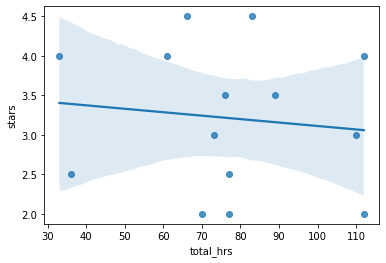

In [14]:
sns.regplot(x=closed_biz_hrs["total_hrs"], y=closed_biz_hrs["stars"])
coeff = np.polyfit(x=closed_biz_hrs["total_hrs"], y=closed_biz_hrs["stars"], deg=1)
print(coeff)
y = coeff[0]*closed_biz_hrs["total_hrs"] + coeff[1]
print("The equation for the line is y = " + str(coeff[0]) + "x + " + str(coeff[1]))

Now, we are creating a new data frame with restaurants on 2nd Ave that are still open, printed the length of the data frame, and displayed the data frame. This is so that we can compare the characteristics of closed restaurants from the cell above and open restaurants. We have also displayed the average number of stars of open restaurants and the average total hours of open businesses. We included the Spearman correlation on the total hours open for still opened restaurants and the star ratings as again we are looking at ranked data in this case. 

In [15]:
open_biz_hrs = pd.DataFrame(is_open)
open_total_hrs = []
for biz in is_open.hours:
    open_total_hrs.append(open_hrs(biz))
open_biz_hrs["total_hrs"] = open_total_hrs

print("Avg stars of open restaurants: " + str(np.mean(open_biz_hrs["stars"])))
print("Standard Deviation of stars: " + str(np.std(closed_biz_hrs["stars"])))

print()

print("Avg total hours of open businesses: " + str(np.mean(open_biz_hrs["total_hrs"])))
print("Standard Deviation of total hours: " + str(np.std(closed_biz_hrs["total_hrs"])))

print()

# Spearman correlation
print(stats.spearmanr(open_biz_hrs["total_hrs"], open_biz_hrs["stars"]))

open_biz_hrs

Avg stars of open restaurants: 3.5588235294117645
Standard Deviation of stars: 0.880630571852711

Avg total hours of open businesses: 74.41176470588235
Standard Deviation of total hours: 23.57110389386781

SpearmanrResult(correlation=-0.02638865733998216, pvalue=0.9199216567242325)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,total_hrs
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",107.50
159,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,TN,37201,36.162799,-86.776016,4.0,182,1,"{'GoodForDancing': 'True', 'Smoking': ""u'no'"",...","Nightlife, Restaurants, Bars, Mexican","{'Monday': '0:0-0:0', 'Wednesday': '11:0-22:0'...",85.00
7710,xB2NmS0JG1Vgy7dK2ftcwQ,Taco Bell Cantina,131 2nd Ave N,Nashville,TN,37201,36.162724,-86.776014,2.5,26,1,{'RestaurantsDelivery': 'True'},"Arts & Entertainment, Music Venues, Fast Food,...","{'Monday': '10:0-1:45', 'Tuesday': '10:0-1:45'...",112.25
17517,maOMGu_2dSHKydBgZdTsvQ,Wildhorse Saloon,120 2nd Ave N,Nashville,TN,37201,36.162766,-86.775178,3.5,559,1,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Tours, Local Flavor, Hotels & Travel, Arts & E...","{'Thursday': '16:0-22:0', 'Friday': '12:0-0:0'...",30.00
26266,xlMQBBt9wrtahdqiRDcVSg,The Stillery,113 2nd Ave N,Nashville,TN,37201,36.162249,-86.775712,4.5,2588,1,"{'BikeParking': 'True', 'CoatCheck': 'False', ...","American (New), Restaurants, Pubs, Beer, Wine ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",79.00
27061,LF8UjsBRaQ4Aqwu3ARxnBg,Rodizio Grill The Brazilian Steakhouse,"166 2nd Ave N, Ste C",Nashville,TN,37201,36.164010,-86.776030,4.0,510,1,"{'BikeParking': 'False', 'RestaurantsAttire': ...","Gluten-Free, Brazilian, Restaurants, Steakhouses","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',...",62.50
71945,UlrEGYuRd5pxW0n4iCR9CQ,Chicken Guy!,139 2nd Ave N,Nashville,TN,37201,36.162919,-86.776068,3.0,24,1,"{'OutdoorSeating': 'True', 'Caters': 'True', '...","Restaurants, Chicken Shop, Fast Food, Sandwiches","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",91.00
83703,NXaw6ox4vQkLfQ13sq_oGg,Porch Coffee & Market,401 2nd Ave S,Nashville,TN,37201,36.157509,-86.772627,4.5,14,1,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Convenience Stores, Food, Beer, Wine & Spirits...","{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'...",61.50
85574,ZDY-jvetOMOE5BMM8e_BcQ,Dick's Last Resort - Nashville,154 2nd Ave N,Nashville,TN,37201,36.163671,-86.775767,3.0,153,1,"{'GoodForKids': 'False', 'RestaurantsGoodForGr...","American (Traditional), Restaurants, Nightlife...","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'...",60.00
87435,Dp6QT6_evsKemZNKgtJ7nA,REPUBLIC quality food & drink,109 2nd Ave N,Nashville,TN,37201,36.162162,-86.775591,4.0,16,1,"{'WheelchairAccessible': 'True', 'RestaurantsR...","Gastropubs, Restaurants","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",56.00


This plot is used to showcase the relationship between the total hours open for open restaurants and their respective star ratings. We have included the calculations for the line of best fit for the data.

[-2.27546609e-03  3.72814498e+00]
The equation for the line is y = -0.002275466089118631x + 3.728144976631475


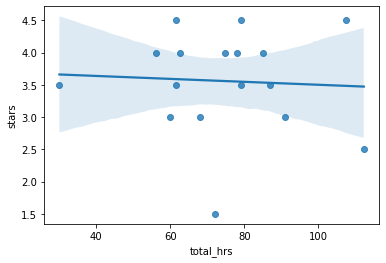

In [16]:
sns.regplot(x=open_biz_hrs["total_hrs"], y=open_biz_hrs["stars"])
coeff = np.polyfit(x=open_biz_hrs["total_hrs"], y=open_biz_hrs["stars"], deg=1)
print(coeff)
y = coeff[0]*open_biz_hrs["total_hrs"] + coeff[1]
print("The equation for the line is y = " + str(coeff[0]) + "x + " + str(coeff[1]))

Findings:
 - On both plots, the slope comparing total hours of a restaurant per week and stars of restaurants on 2nd Ave is very small.  There's a lot of scatter among the points, which suggests that the stars and total hours open per week are not correlated.
 - Upon running a Spearman correlation, we discovered there's basically no correlation between total hours and star ratings.
 
What this means:
 - For both open and closed restaurants, total hours open per week are most likely not related to the average star rating received by the restaurant.  From the Spearman correlation, this suggests that hours don't impact the star rating received by our restaurant.

Below, we are putting the restaurants on 2nd Ave into a dataframe with only the column denoting whether it's open (is_open) and the number of reviews per restaurant (review_count) so that we can compare the results.

In [17]:
is_open_review = two_ave[["is_open", "review_count"]]
print(len(is_open_review))
is_open_review

31


,is_open,review_count
89,1,593
159,1,182
1494,0,89
4689,0,75
7710,1,26
17517,1,559
26266,1,2588
27061,1,510
40375,0,115
55579,0,12


Here, we are computing a logistic regression on the review counts of the resutaurants and whether or not the restaurant is still open since is_open is a binary output variable. 

Coefficient: [[0.00419223]]
Intercept (beta)): [-0.48046502]
Odds Ratio: [0.61849571]


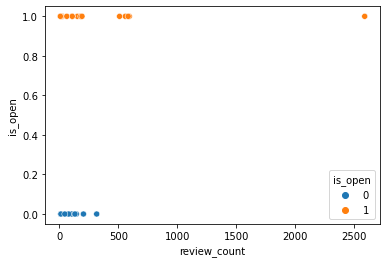

In [18]:
x = np.array(is_open_review["review_count"]).reshape(-1, 1)
y = np.array(is_open_review["is_open"])
sns.scatterplot(data=is_open_review, x="review_count", y="is_open", hue="is_open")
reg = LogisticRegression()
reg.fit(x, y)
print("Coefficient: " + str(reg.coef_))
print("Intercept (beta)): " + str(reg.intercept_))
print("Odds Ratio: " + str(math.e**reg.intercept_))

Interpretation (https://quantifyinghealth.com/interpret-logistic-regression-coefficients/):
 - A open restaurant has (1 - 0.58)% reduction in reviews.

Here, we opened the Yelp Academic Dataset Tip Json file and read it. We then converted the file into a CSV file so that we could more easily manipulate and clean the data.

In [15]:
with open('./project_files/yelp_academic_dataset_tip.json', encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile, lines=True)
df.to_csv('./project_files/yelp_academic_dataset_tip.csv', encoding='utf-8', index = False)

In [19]:
tip_data = pd.read_csv('./project_files/yelp_academic_dataset_tip.csv')
tip_data

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


Here, we are joining the two individual datasets together by business_id which is common in both files so that we can get more information about the reviews and the dates they were collected.

In [20]:
tip_data = two_ave.join(tip_data.set_index("business_id"), on="business_id")
tip_data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,compliment_count
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",dDjxiPu25aOV7QDLchJWog,Amazing ice cream! So creamy.. I had the cake ...,2016-08-16 16:02:21,0.0
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",1jQ6VQOeHZH7WMWMGXn9sw,Kleiner charmanter Laden mit interessanter Aus...,2013-09-28 16:32:35,0.0
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",bT3vwPYwKIAraRBYcS5G8g,Almond milk coffees! Hallelujah! BRILLIANTLY...,2014-10-29 02:34:21,0.0
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",Vh8EbeyWWbwxokrnvgwkcg,Best lattes and ice team on Broadway!!,2015-10-21 19:19:27,0.0
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",BLBCPMS4XHm4fcjMMaOJHw,The only hand dipped ice cream in town (that I...,2013-12-15 22:26:42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",aEgwdSFEG3vPjdzxVOhiuQ,Place is awesome started with spinach artichok...,2013-01-20 04:10:12,0.0
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",ibGEJ9pZNtDtJZ8L-N_S3Q,Celebrating our third anniversary.,2012-05-16 23:02:21,0.0
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",rGtCTG8BglwrGNKFzAORbw,$89 for a raging dose of diarrhea. Both of us....,2018-08-01 03:35:58,0.0
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",D8s9jiDE1dfjS5El9mwnTA,Awesome!,2018-07-21 20:10:18,0.0


## Tip Data Cleaning

After combining the tip data with the two_ave data, we started to analyze the tip text using a sentiment analysis technique. First, we imported stopwords which are typically words that don't add meaning to text so that we could single out important words that could provide us with more information about whether the reviews were negative or positive in sentiment.

In [18]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

We referenced https://www.nltk.org/api/nltk.html to clean the tip data and https://youtu.be/0j3l5GciFIo to understand an approach for tsentiment analysis.

In [22]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

After importing the stopwords, we wanted to find the percentage of words in each review that were stop words to see how much data from the text would be lost. To do this, we found the number of words in each tip text and the number of words in each text that was a stopword.

In [23]:
tip_data["review_num_words"] = tip_data["text"].map(lambda txt: len(str(txt).split()))
tip_data["review_num_words"]

89        14
89         9
89         6
89         7
89        15
          ..
150322    16
150322     4
150322    16
150322     1
150322    16
Name: review_num_words, Length: 739, dtype: int64

In [24]:
tip_data["num_stopwords"] = tip_data["text"].map(lambda txt: len([word for word in str(txt).split() if word.lower() in stopwords.words('english')]))
tip_data["num_stopwords"]

89         6
89         0
89         0
89         2
89         6
          ..
150322     4
150322     1
150322     8
150322     0
150322    10
Name: num_stopwords, Length: 739, dtype: int64

In [25]:
tip_data["stopword_ratio"] = tip_data["num_stopwords"] / tip_data["review_num_words"]
tip_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes,categories,hours,user_id,text,date,compliment_count,review_num_words,num_stopwords,stopword_ratio
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",dDjxiPu25aOV7QDLchJWog,Amazing ice cream! So creamy.. I had the cake ...,2016-08-16 16:02:21,0.0,14,6,0.428571
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",1jQ6VQOeHZH7WMWMGXn9sw,Kleiner charmanter Laden mit interessanter Aus...,2013-09-28 16:32:35,0.0,9,0,0.000000
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",bT3vwPYwKIAraRBYcS5G8g,Almond milk coffees! Hallelujah! BRILLIANTLY...,2014-10-29 02:34:21,0.0,6,0,0.000000
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",Vh8EbeyWWbwxokrnvgwkcg,Best lattes and ice team on Broadway!!,2015-10-21 19:19:27,0.0,7,2,0.285714
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",BLBCPMS4XHm4fcjMMaOJHw,The only hand dipped ice cream in town (that I...,2013-12-15 22:26:42,0.0,15,6,0.400000


Next, we sorted the stopword_ratio in descending order because the greater the stopword_ratio, the more data will be lost because that means most of the text was stopwords.

In [27]:
%sql SELECT * FROM tip_data ORDER BY stopword_ratio DESC

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes,categories,hours,user_id,text,date,compliment_count,review_num_words,num_stopwords,stopword_ratio
0,LF8UjsBRaQ4Aqwu3ARxnBg,Rodizio Grill The Brazilian Steakhouse,"166 2nd Ave N, Ste C",Nashville,TN,37201,36.164010,-86.776030,4.0,510,...,"{'BikeParking': 'False', 'RestaurantsAttire': ...","Gluten-Free, Brazilian, Restaurants, Steakhouses","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:30',...",2mBkdHYvZVmd-aJknhY1RQ,I am so full!! What a meal!,2013-06-04 01:47:27,0.0,7,5,0.714286
1,nygJ4mY0glpdWGv_Hmp6Dg,Joe's Crab Shack,123 2nd Ave S,Nashville,TN,37201,36.160947,-86.774865,3.0,192,...,"{'OutdoorSeating': 'True', 'BYOBCorkage': ""'no...","American (Traditional), Seafood, Gluten-Free, ...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",X86N8ZSDw5bOw0JvA0da0Q,Not as I remembered. It was ok!,2019-11-21 04:23:29,0.0,7,5,0.714286
2,QUxFneps0qX5S8XpEUnazg,Piranha's Bar & Grill,113 2nd Ave N,Nashville,TN,37201,36.162251,-86.775710,4.0,75,...,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Restaurants, Dive Bars, Sports Bars, Bars, Nig...","{'Monday': '11:0-3:0', 'Tuesday': '11:0-3:0', ...",JeB5mKuuFsrigziQ4cy29g,At the Attic.,2011-06-27 03:40:58,0.0,3,2,0.666667
3,9TvJuG22ZyCXJVYzDaDNxw,Pita Pit,121 2nd Ave N,Nashville,TN,37201,36.162500,-86.775760,3.0,79,...,"{'WiFi': ""'no'"", 'OutdoorSeating': 'False', 'R...","Fast Food, Restaurants, Event Planning & Servi...","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",IpcUBWFoz7tIULuneaavMA,More than just gyros. Very good,2014-08-09 23:12:11,0.0,6,4,0.666667
4,1KpNlu8VM8ukw3uOzmMFPA,BB King's Blues Club,152 2nd Ave N,Nashville,TN,37201,36.163424,-86.776030,3.5,583,...,"{'RestaurantsTakeOut': 'True', 'Caters': 'True...","Music Venues, American (Traditional), Wine Bar...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",XmE885DND87ITKYK92Gh6Q,All I can say is wow,2013-10-18 03:18:42,0.0,6,4,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,nygJ4mY0glpdWGv_Hmp6Dg,Joe's Crab Shack,123 2nd Ave S,Nashville,TN,37201,36.160947,-86.774865,3.0,192,...,"{'OutdoorSeating': 'True', 'BYOBCorkage': ""'no...","American (Traditional), Seafood, Gluten-Free, ...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",dgbZPcRy76qKXP6ueNORBQ,Cheap delish seafood meal.,2017-04-04 04:21:50,0.0,4,0,0.000000
735,nygJ4mY0glpdWGv_Hmp6Dg,Joe's Crab Shack,123 2nd Ave S,Nashville,TN,37201,36.160947,-86.774865,3.0,192,...,"{'OutdoorSeating': 'True', 'BYOBCorkage': ""'no...","American (Traditional), Seafood, Gluten-Free, ...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",qHJnyJFBv9Ql1BxQMpd3iQ,Two drink minimum. Wet towels.,2017-02-01 00:31:02,0.0,5,0,0.000000
736,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,...,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",zLJWgCnkj8yFhy7ZqpNb1A,Happy Valentines!,2012-02-12 02:19:28,0.0,2,0,0.000000
737,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,...,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",WFt2is7jTBCU0q363u-HqQ,Happy anniversary !!!,2012-06-05 23:41:23,0.0,3,0,0.000000


To clean the text data, we got rid of any punctuation that remained and made all characters lowercase. We referenced Geeks for Geeks for the regex way to remove punctuation: https://www.geeksforgeeks.org/python-remove-punctuation-from-string/

In [28]:
#make all of the text lowercase
tip_data["stripped_text"]= tip_data["text"].map(lambda txt: str(txt).lower())

#remove all punctiation
tip_data["stripped_text"]= tip_data["stripped_text"].str.replace(r'[^\w\s]','')
tip_data["stripped_text"]

C:\Users\leah7\AppData\Local\Temp\ipykernel_22180\4064983337.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tip_data["stripped_text"]= tip_data["stripped_text"].str.replace(r'[^\w\s]','')


89        amazing ice cream so creamy i had the cake bat...
89        kleiner charmanter laden mit interessanter aus...
89        almond milk coffees  hallelujah  brilliantly d...
89                     best lattes and ice team on broadway
89        the only hand dipped ice cream in town that i ...
                                ...                        
150322    place is awesome started with spinach artichok...
150322                    celebrating our third anniversary
150322    89 for a raging dose of diarrhea both of us wo...
150322                                              awesome
150322    we just did dessert with a group of girls and ...
Name: stripped_text, Length: 739, dtype: object

We then stripped the text so that no stopwords were contained in them.

In [29]:
stopWords = stopwords.words('english')
tip_data["unique_words"] = tip_data["stripped_text"].map(lambda txt: " ".join(word for word in txt.split() \
                                                                              if word not in stopWords))
tip_data["unique_words"]

89        amazing ice cream creamy cake batter flavor wo...
89        kleiner charmanter laden mit interessanter aus...
89        almond milk coffees hallelujah brilliantly del...
89                            best lattes ice team broadway
89                  hand dipped ice cream town know amazing
                                ...                        
150322    place awesome started spinach artichoke dip mo...
150322                        celebrating third anniversary
150322    89 raging dose diarrhea us wont back needless say
150322                                              awesome
150322           dessert group girls fun beautiful building
Name: unique_words, Length: 739, dtype: object

For our first visualization using the tip dataset, we found the most used non-stopword words used in the tip_data["text"] section.

We referred to https://stackoverflow.com/questions/37483470/how-to-calculate-number-of-words-in-a-string-in-dataframe to find the value_counts() function.

In [30]:
words_count = []
for lst in tip_data["unique_words"].str.split():
    words_count += lst

word_count = pd.Series(words_count).value_counts()
word_count

great        208
food         157
good         155
service       85
music         73
            ... 
kj             1
locations      1
midtown        1
twist          1
girls          1
Length: 1630, dtype: int64

<AxesSubplot:>

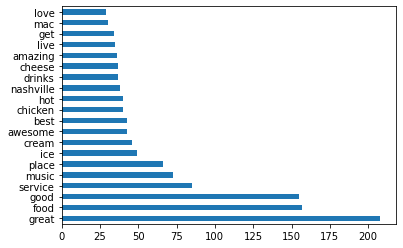

In [31]:
word_count[:20].plot(kind="barh")

The last step we took was lemmatizing our words, meaning that we would change all of the words back to their basic forms. We referenced https://www.geeksforgeeks.org/python-lemmatization-with-nltk/ on how to use nltk for lemmatization.

In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
lemmatizer = WordNetLemmatizer()
tip_data["unique_words"] = tip_data["unique_words"].map(lambda x: " ".join(lemmatizer.lemmatize(str(word)) \
                                                                             for word in x.split()))

tip_data["unique_words"]

89        amazing ice cream creamy cake batter flavor wo...
89        kleiner charmanter laden mit interessanter aus...
89        almond milk coffee hallelujah brilliantly deli...
89                             best latte ice team broadway
89                  hand dipped ice cream town know amazing
                                ...                        
150322    place awesome started spinach artichoke dip mo...
150322                        celebrating third anniversary
150322       89 raging dose diarrhea u wont back needle say
150322                                              awesome
150322            dessert group girl fun beautiful building
Name: unique_words, Length: 739, dtype: object

We then imported textblob to use the function . Polarity is how positive or negative a piece of text is from -1 to 1, where a negative number signifies a negative sentiment. Subjectivity is a measure of whether or not a piece of text is subjective or objective between 0 and 1.

In [34]:
from textblob import TextBlob

In [35]:
tip_data["polarity"] = tip_data["unique_words"].map(lambda x: TextBlob(x).sentiment[0])
tip_data["subjectivity"] = tip_data["unique_words"].map(lambda x: TextBlob(x).sentiment[1])
tip_data

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,text,date,compliment_count,review_num_words,num_stopwords,stopword_ratio,stripped_text,unique_words,polarity,subjectivity
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,Amazing ice cream! So creamy.. I had the cake ...,2016-08-16 16:02:21,0.0,14,6,0.428571,amazing ice cream so creamy i had the cake bat...,amazing ice cream creamy cake batter flavor wo...,0.800,0.95
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,Kleiner charmanter Laden mit interessanter Aus...,2013-09-28 16:32:35,0.0,9,0,0.000000,kleiner charmanter laden mit interessanter aus...,kleiner charmanter laden mit interessanter aus...,0.000,0.00
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,Almond milk coffees! Hallelujah! BRILLIANTLY...,2014-10-29 02:34:21,0.0,6,0,0.000000,almond milk coffees hallelujah brilliantly d...,almond milk coffee hallelujah brilliantly deli...,1.000,1.00
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,Best lattes and ice team on Broadway!!,2015-10-21 19:19:27,0.0,7,2,0.285714,best lattes and ice team on broadway,best latte ice team broadway,1.000,0.30
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,...,The only hand dipped ice cream in town (that I...,2013-12-15 22:26:42,0.0,15,6,0.400000,the only hand dipped ice cream in town that i ...,hand dipped ice cream town know amazing,0.600,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,...,Place is awesome started with spinach artichok...,2013-01-20 04:10:12,0.0,16,4,0.250000,place is awesome started with spinach artichok...,place awesome started spinach artichoke dip mo...,0.500,0.50
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,...,Celebrating our third anniversary.,2012-05-16 23:02:21,0.0,4,1,0.250000,celebrating our third anniversary,celebrating third anniversary,0.000,0.00
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,...,$89 for a raging dose of diarrhea. Both of us....,2018-08-01 03:35:58,0.0,16,8,0.500000,89 for a raging dose of diarrhea both of us wo...,89 raging dose diarrhea u wont back needle say,0.000,0.00
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,...,Awesome!,2018-07-21 20:10:18,0.0,1,0,0.000000,awesome,awesome,1.000,1.00


We further cleaned tip_data by removing columns that we would not be using during our analyses.

In [36]:
tip_data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'user_id', 'text', 'date',
       'compliment_count', 'review_num_words', 'num_stopwords',
       'stopword_ratio', 'stripped_text', 'unique_words', 'polarity',
       'subjectivity'],
      dtype='object')

In [37]:
tip_data = tip_data.drop(['latitude','longitude','postal_code','compliment_count', \
                          'stripped_text','unique_words'], axis=1)
tip_data

,business_id,name,address,city,state,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,review_num_words,num_stopwords,stopword_ratio,polarity,subjectivity
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",dDjxiPu25aOV7QDLchJWog,Amazing ice cream! So creamy.. I had the cake ...,2016-08-16 16:02:21,14,6,0.428571,0.800,0.95
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",1jQ6VQOeHZH7WMWMGXn9sw,Kleiner charmanter Laden mit interessanter Aus...,2013-09-28 16:32:35,9,0,0.000000,0.000,0.00
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",bT3vwPYwKIAraRBYcS5G8g,Almond milk coffees! Hallelujah! BRILLIANTLY...,2014-10-29 02:34:21,6,0,0.000000,1.000,1.00
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",Vh8EbeyWWbwxokrnvgwkcg,Best lattes and ice team on Broadway!!,2015-10-21 19:19:27,7,2,0.285714,1.000,0.30
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...",BLBCPMS4XHm4fcjMMaOJHw,The only hand dipped ice cream in town (that I...,2013-12-15 22:26:42,15,6,0.400000,0.600,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",aEgwdSFEG3vPjdzxVOhiuQ,Place is awesome started with spinach artichok...,2013-01-20 04:10:12,16,4,0.250000,0.500,0.50
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",ibGEJ9pZNtDtJZ8L-N_S3Q,Celebrating our third anniversary.,2012-05-16 23:02:21,4,1,0.250000,0.000,0.00
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",rGtCTG8BglwrGNKFzAORbw,$89 for a raging dose of diarrhea. Both of us....,2018-08-01 03:35:58,16,8,0.500000,0.000,0.00
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",D8s9jiDE1dfjS5El9mwnTA,Awesome!,2018-07-21 20:10:18,1,0,0.000000,1.000,1.00


Next, we decided to create visualizations of the polarity vs subjectivity to see their relationship amongst the restaurants and to see if there was a different in this relationship for restaurants that were closed vs open. We referenced homework 3 problem 13 to create the plotting function and to use .apply() to graph every single unique restaurant we had in our data.

In [38]:
# Create plotting function
def plot_by_biz(df):
    return sns.lmplot(x="subjectivity", y="polarity", data=df, hue="name")

In [46]:
%sql open_tip << SELECT * FROM tip_data WHERE is_open == 1

Returning data to local variable open_tip


business_id
1KpNlu8VM8ukw3uOzmMFPA    <seaborn.axisgrid.FacetGrid object at 0x000002...
2VczMMo9tWBNPBEHMnoP5w    <seaborn.axisgrid.FacetGrid object at 0x000002...
Dp6QT6_evsKemZNKgtJ7nA    <seaborn.axisgrid.FacetGrid object at 0x000002...
LF8UjsBRaQ4Aqwu3ARxnBg    <seaborn.axisgrid.FacetGrid object at 0x000002...
NXaw6ox4vQkLfQ13sq_oGg    <seaborn.axisgrid.FacetGrid object at 0x000002...
RMt9p9efzYfV_cHwXLB-CA    <seaborn.axisgrid.FacetGrid object at 0x000002...
Tdp95AviUqzvUd3H2C5xvw    <seaborn.axisgrid.FacetGrid object at 0x000002...
UlrEGYuRd5pxW0n4iCR9CQ    <seaborn.axisgrid.FacetGrid object at 0x000002...
X_E7U2lVNEwbH_gpOBmAHQ    <seaborn.axisgrid.FacetGrid object at 0x000002...
ZDY-jvetOMOE5BMM8e_BcQ    <seaborn.axisgrid.FacetGrid object at 0x000002...
maOMGu_2dSHKydBgZdTsvQ    <seaborn.axisgrid.FacetGrid object at 0x000002...
nygJ4mY0glpdWGv_Hmp6Dg    <seaborn.axisgrid.FacetGrid object at 0x000002...
oaboaRBUgGjbo2kfUIKDLQ    <seaborn.axisgrid.FacetGrid object at 0x000002...


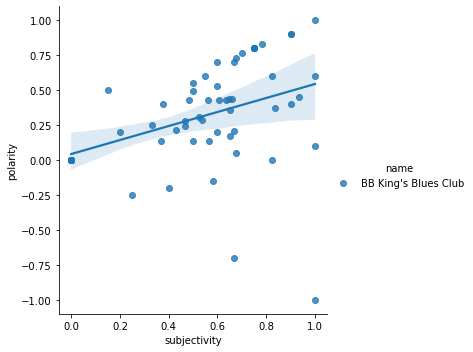

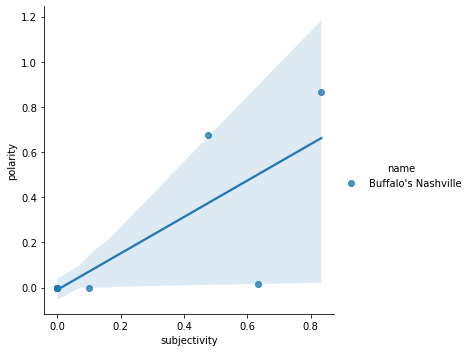

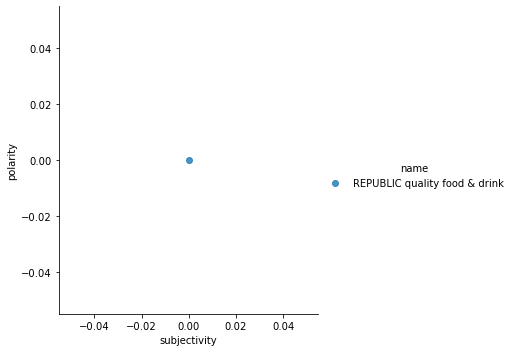

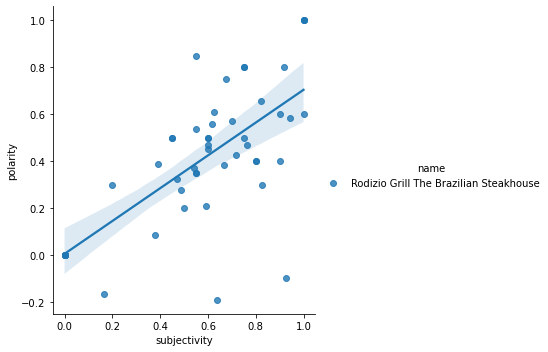

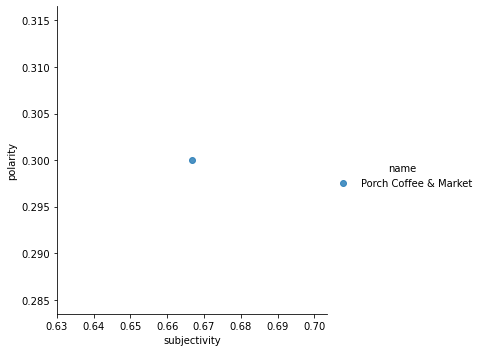

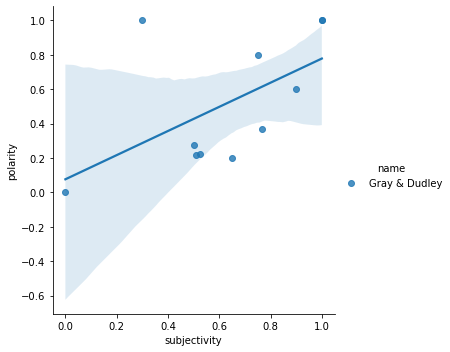

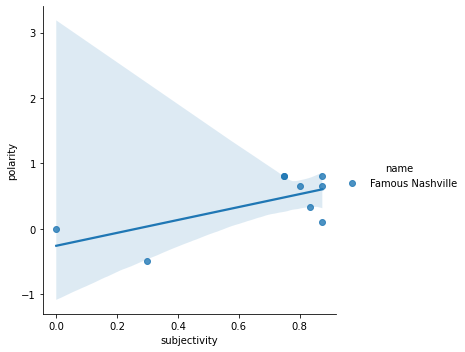

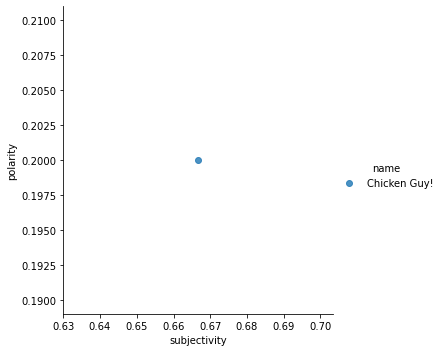

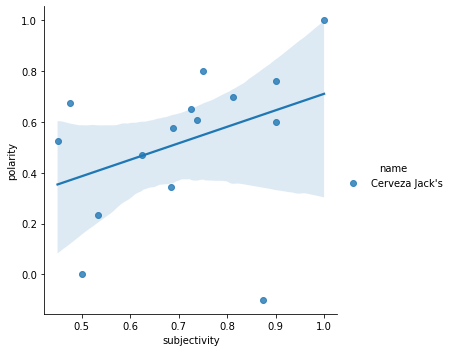

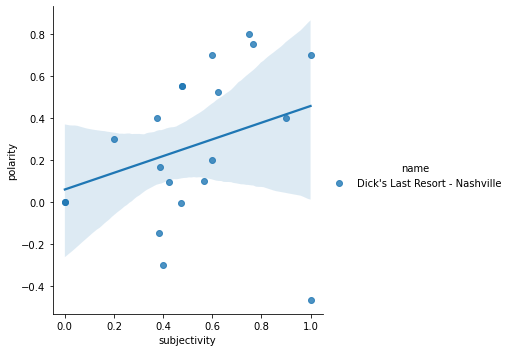

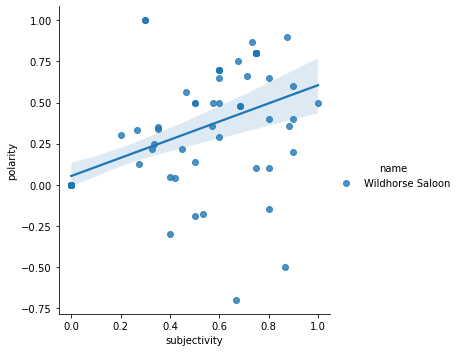

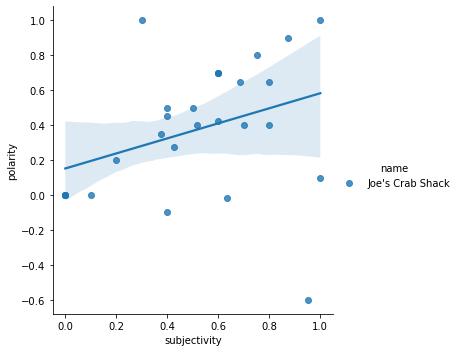

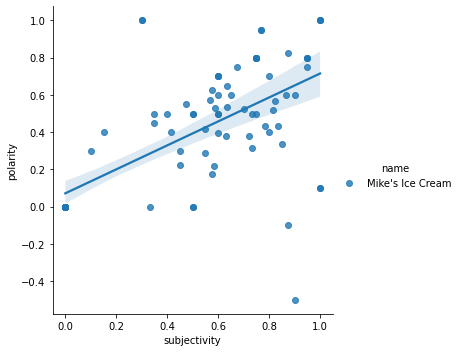

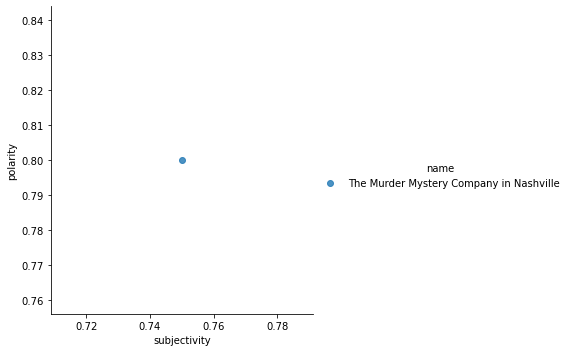

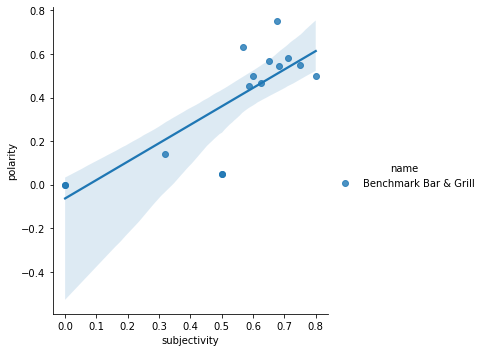

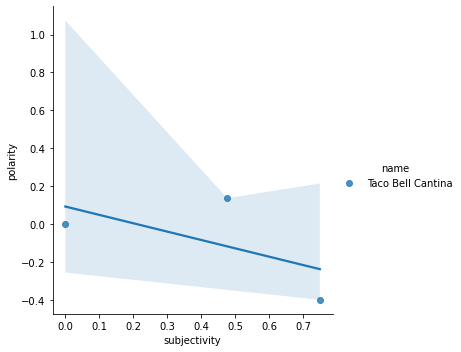

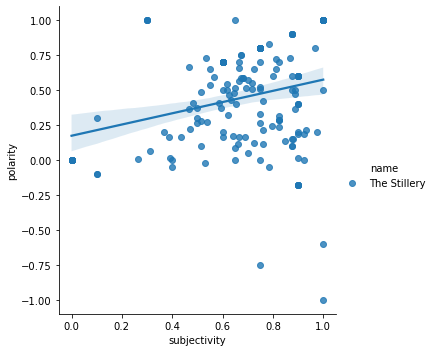

In [47]:
open_tip.groupby("business_id").apply(plot_by_biz)

In [48]:
%sql closed_tip << SELECT * FROM tip_data WHERE is_open == 0

Returning data to local variable closed_tip


business_id
2MAQeAqmD8enCT2ZYqUgIQ    <seaborn.axisgrid.FacetGrid object at 0x000002...
8s1uT8dyBEUwTNeHoZntMg    <seaborn.axisgrid.FacetGrid object at 0x000002...
9TvJuG22ZyCXJVYzDaDNxw    <seaborn.axisgrid.FacetGrid object at 0x000002...
DaQ6YSXmoXQH1qYXNSR1hA    <seaborn.axisgrid.FacetGrid object at 0x000002...
E8nFvonCaW63W9d3zUYhgQ    <seaborn.axisgrid.FacetGrid object at 0x000002...
JWUkEIayb3F8la3TWe-eyw    <seaborn.axisgrid.FacetGrid object at 0x000002...
NfOnxD8NT4UQmSfBY6iqng    <seaborn.axisgrid.FacetGrid object at 0x000002...
QUxFneps0qX5S8XpEUnazg    <seaborn.axisgrid.FacetGrid object at 0x000002...
VuubVgCDC4rbvF_iPIhh1A    <seaborn.axisgrid.FacetGrid object at 0x000002...
WrgdQF8kzvONbZctSPlF4A    <seaborn.axisgrid.FacetGrid object at 0x000002...
cxQ3CKel3EEZLYEyu9v3og    <seaborn.axisgrid.FacetGrid object at 0x000002...
k7o9D7XQ0eGuz3nmKB1wXg    <seaborn.axisgrid.FacetGrid object at 0x000002...
qnOffBt8iV6umLvDZ5PNDw    <seaborn.axisgrid.FacetGrid object at 0x000002...


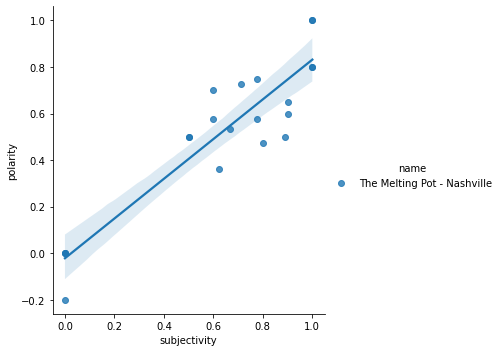

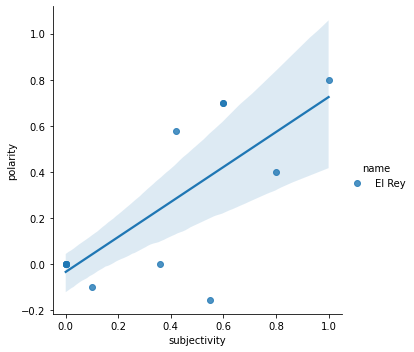

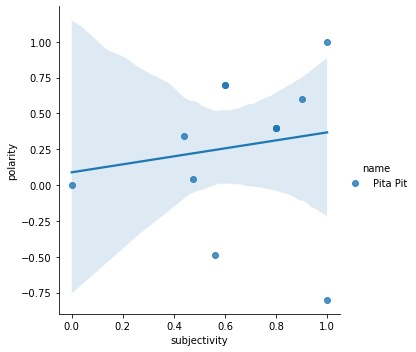

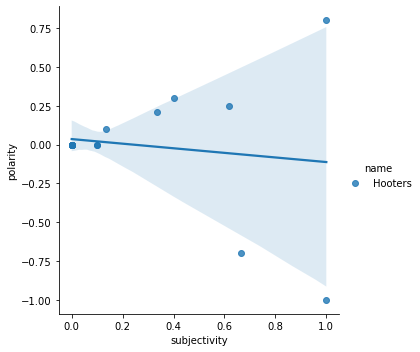

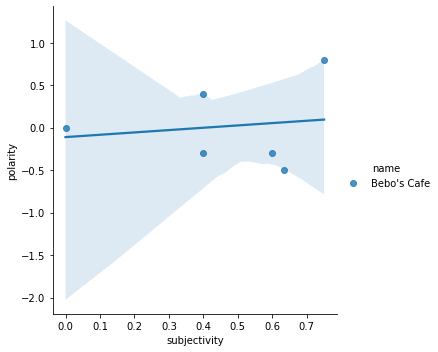

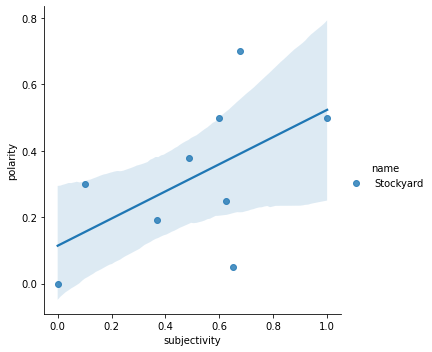

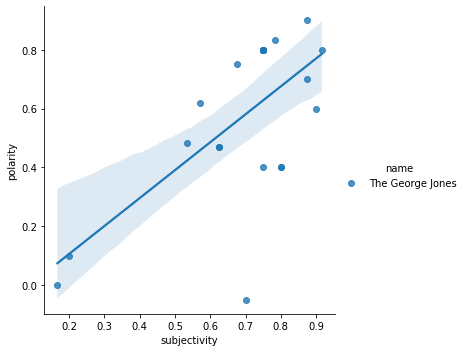

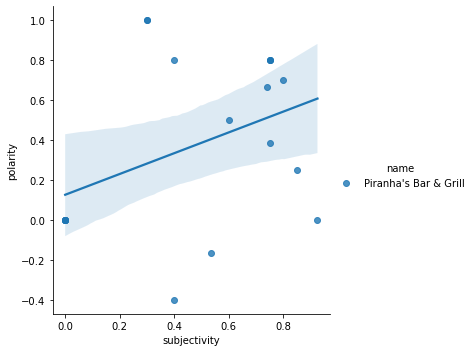

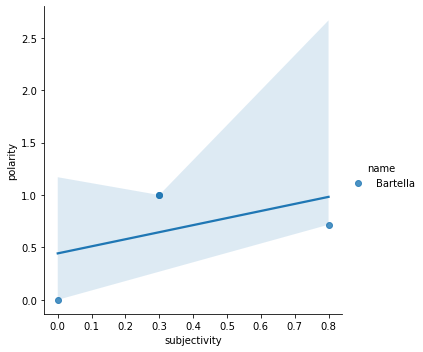

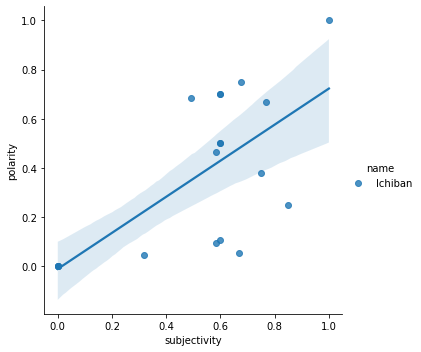

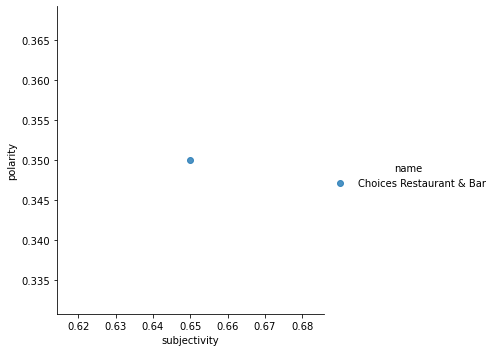

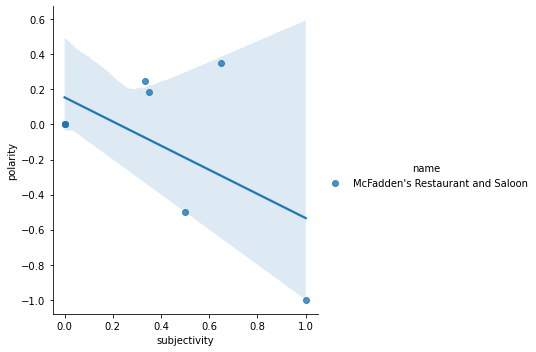

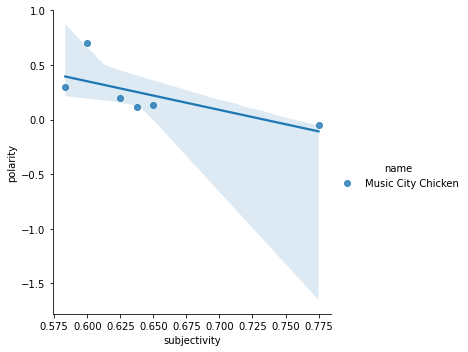

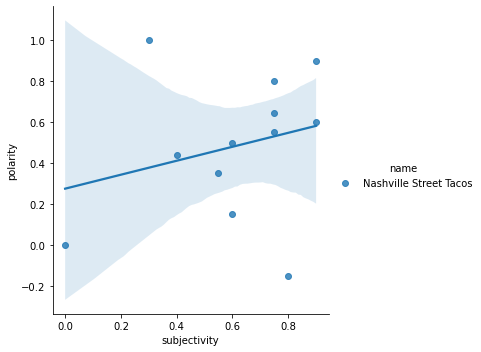

In [49]:
closed_tip.groupby("business_id").apply(plot_by_biz)